### An Example of Poor Code

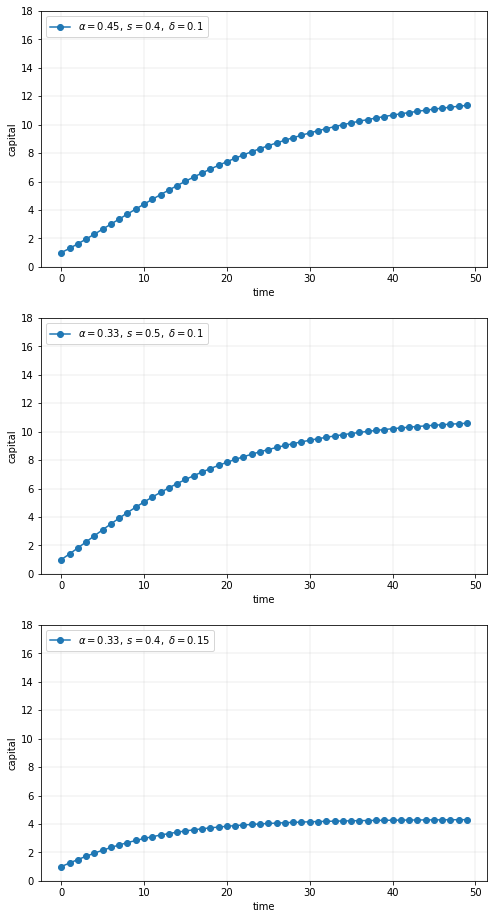

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10,6)

# Allocate memory for time series
k = np.empty(50)
fig, axes = plt.subplots(3, 1, figsize=(8, 16))

# Trajectories with different α
δ = 0.1
s = 0.4
α = (0.25, 0.33, 0.45)

for j in range(3):
    k[0] = 1
    for t in range(49):
        k[t+1] = s * k[t]**α[j] + (1 - δ) * k[t]

axes[0].plot(k, 'o-', label=rf"$\alpha = {α[j]},\; s = {s},\; \delta={δ}$")
axes[0].grid(lw=0.2)
axes[0].set_ylim(0, 18)
axes[0].set_xlabel('time')
axes[0].set_ylabel('capital')
axes[0].legend(loc = 'upper left', frameon = True)

# Trajectories with different s
δ = 0.1
α = 0.33
s = (0.3, 0.4, 0.5)

for j in range(3):
    k[0] = 1
    
    for t in range(49):
        k[t+1] = s[j] * k[t]**α + (1 - δ) * k[t]

axes[1].plot(k, 'o-', label=rf"$\alpha = {α},\; s = {s[j]},\; \delta={δ}$")
axes[1].grid(lw=0.2)
axes[1].set_xlabel('time')
axes[1].set_ylabel('capital')
axes[1].set_ylim(0, 18)
axes[1].legend(loc = 'upper left', frameon = True)

# Trajectories with different δ
δ = (0.05, 0.1, 0.15)
α = 0.33
s = 0.4

for j in range(3):
    k[0] = 1
    for t in range(49):
        k[t+1] = s * k[t]**α + (1 - δ[j]) * k[t]

axes[2].plot(k, 'o-', label=rf"$\alpha = {α},\; s = {s},\; \delta={δ[j]}$")
axes[2].set_ylim(0, 18)
axes[2].set_xlabel('time')
axes[2].set_ylabel('capital')
axes[2].grid(lw = 0.2)
axes[2].legend(loc = 'upper left', frameon = True)

plt.show()

### Revisiting the Example

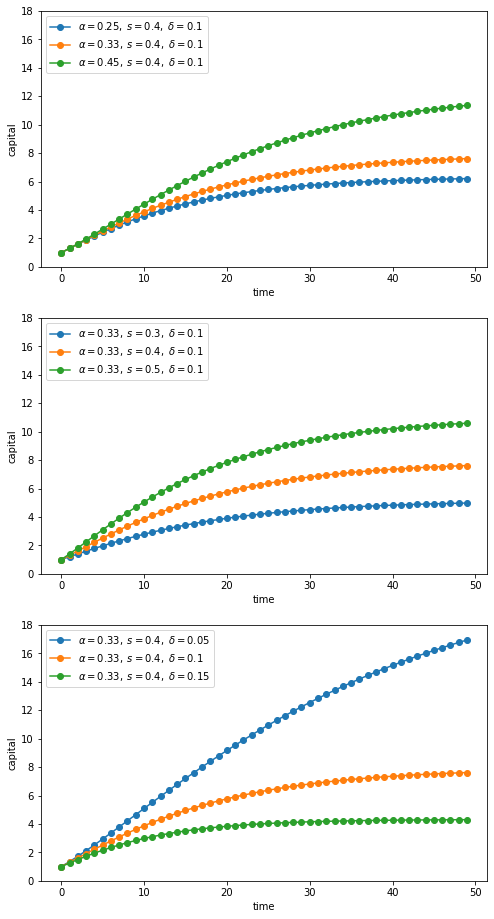

In [2]:
from itertools import product

def plot_path(ax, αs, s_vals, δs, time_series_length=50):
    """
    Add a time series plot to the axes ax for all given parameters.
    """
    
    k = np.empty(time_series_length)
    for (α, s, δ) in product(αs, s_vals, δs):
        k[0] = 1
        
        for t in range(time_series_length-1):
            k[t+1] = s * k[t]**α + (1 - δ) * k[t]
        
        ax.plot(k, 'o-', label=rf"$\alpha = {α},\; s = {s},\; \delta = {δ}$")
    
    ax.set_xlabel('time')
    ax.set_ylabel('capital')
    ax.set_ylim(0, 18)
    ax.legend(loc = 'upper left', frameon = True)

fig, axes = plt.subplots(3, 1, figsize=(8, 16))

# Parameters (αs, s_vals, δs)
set_one = ([0.25, 0.33, 0.45], [0.4], [0.1])
set_two = ([0.33], [0.3, 0.4, 0.5], [0.1])
set_three = ([0.33], [0.4], [0.05, 0.1, 0.15])

for (ax, params) in zip(axes, (set_one, set_two, set_three)):
    αs, s_vals, δs = params
    plot_path(ax, αs, s_vals, δs)

plt.show()

### Exercises

In [3]:
from scipy.optimize import brentq

# Compute equilibrium
def h(p):

    return p**(-1) - (np.exp(0.1 * p) - 1) # demand - supply

p_star = brentq(h, 2, 4)
q_star = np.exp(0.1 * p_star) - 1
print(f'Equilibrium price is {p_star: .2f}')
print(f'Equilibrium quantity is {q_star: .2f}')

Equilibrium price is  2.93
Equilibrium quantity is  0.34


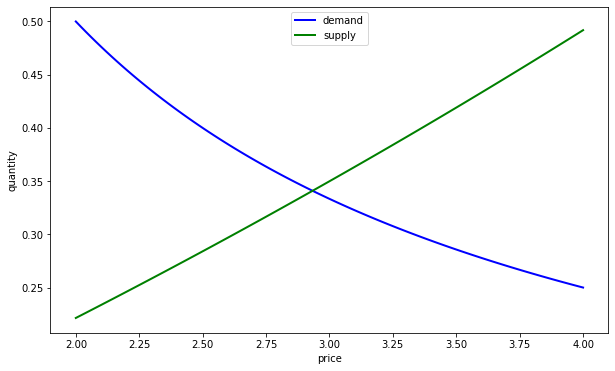

In [4]:
# Now plot
grid = np.linspace(2, 4, 100)
fig, ax = plt.subplots()

qs = np.exp(0.1 * grid) - 1
qd = grid**(-1)

ax.plot(grid, qd, 'b-', lw = 2, label = 'demand')
ax.plot(grid, qs, 'g-', lw = 2, label = 'supply')

ax.set_xlabel('price')
ax.set_ylabel('quantity')
ax.legend(loc='upper center')

plt.show()

In [5]:
# Compute equilibrium
def h(p):

    return 1.25 * p**(-1) - (np.exp(0.1 * p) - 1)

p_star = brentq(h, 2, 4)

q_star = np.exp(0.1 * p_star) - 1

print(f'Equilibrium price is {p_star: .2f}')
print(f'Equilibrium quantity is {q_star: .2f}')

Equilibrium price is  3.25
Equilibrium quantity is  0.38


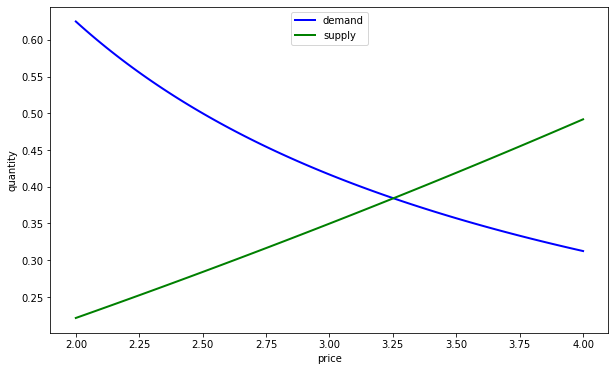

In [6]:
# Now plot
p_grid = np.linspace(2, 4, 100)
fig, ax = plt.subplots()

qs = np.exp(0.1 * p_grid) - 1
qd = 1.25 * p_grid**(-1)

ax.plot(grid, qd, 'b-', lw = 2, label = 'demand')
ax.plot(grid, qs, 'g-', lw = 2, label = 'supply')

ax.set_xlabel('price')
ax.set_ylabel('quantity')
ax.legend(loc='upper center')

plt.show()

In [7]:
class Equilibrium:

    def __init__(self, α=0.1, β=1, γ=1, δ=1):
        self.α, self.β, self.γ, self.δ = α, β, γ, δ
    
    
    def qs(self, p):
        return np.exp(self.α * p) - self.β
    
    
    def qd(self, p):
        return self.γ * p**(-self.δ)
    
    
    def compute_equilibrium(self):
        def h(p):
            return self.qd(p) - self.qs(p)
        
        p_star = brentq(h, 2, 4)
        q_star = np.exp(self.α * p_star) - self.β
        print(f'Equilibrium price is {p_star: .2f}')
        print(f'Equilibrium quantity is {q_star: .2f}')
    
    
    def plot_equilibrium(self):

        # Now plot
        grid = np.linspace(2, 4, 100)
        fig, ax = plt.subplots()

        ax.plot(grid, self.qd(grid), 'b-', lw = 2, label = 'demand')
        ax.plot(grid, self.qs(grid), 'g-', lw = 2, label = 'supply')

        ax.set_xlabel('price')
        ax.set_ylabel('quantity')
        ax.legend(loc='upper center')

        plt.show()

In [8]:
eq = Equilibrium()

In [9]:
eq.compute_equilibrium()

Equilibrium price is  2.93
Equilibrium quantity is  0.34


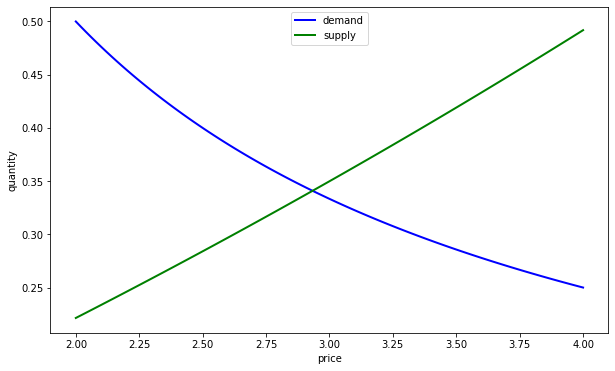

In [10]:
eq.plot_equilibrium()

In [11]:
eq.γ = 1.25

In [12]:
eq.compute_equilibrium()

Equilibrium price is  3.25
Equilibrium quantity is  0.38


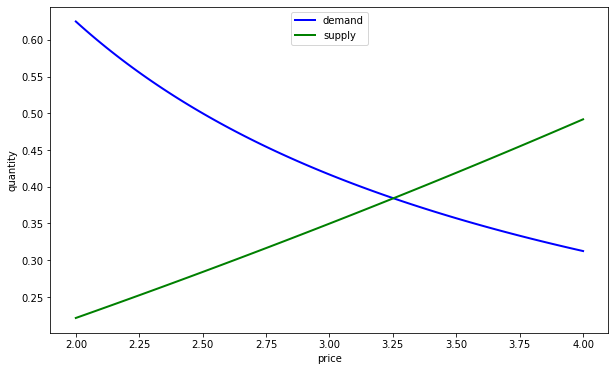

In [13]:
eq.plot_equilibrium()

### End.